In [70]:
from datasets import load_dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [71]:
df = load_dataset("lukebarousse/data_jobs")['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [ ]:
df_US = df[df['job_country'] == "United States"].copy()
df_US_explode_skills = df_US.explode("job_skills").copy()
top_3_jobs = df_US['job_title_short'].value_counts().head(3).index.tolist()
df_US_top3_jobs = df_US_explode_skills[df_US_explode_skills['job_title_short'].isin(top_3_jobs)].copy()
df_US_final = df_US_top3_jobs.groupby(
    ['job_title_short', 'job_skills']
).size().reset_index(name='skill_count').sort_values('skill_count',ascending=False).groupby('job_title_short').head(5)

In [ ]:
df_total_US_jobs = df_US['job_title_short'].value_counts().to_frame().reset_index()
df_US_true_final = pd.merge(df_US_final, df_total_US_jobs, how='left', on='job_title_short')
df_US_true_final['percentage_of_jobs_with_skill'] = (df_US_true_final['skill_count']/df_US_true_final['count'] * 100).round(1)

,job_title_short,job_skills,skill_count,count,percentage_of_jobs_with_skill
0,Data Scientist,python,42379,58830,72.0
1,Data Analyst,sql,34452,67816,50.8
2,Data Scientist,sql,30034,58830,51.1
3,Data Analyst,excel,27519,67816,40.6
4,Data Scientist,r,26022,58830,44.2
5,Data Engineer,sql,23958,35080,68.3
6,Data Engineer,python,22762,35080,64.9
7,Data Analyst,tableau,19311,67816,28.5
8,Data Analyst,python,18382,67816,27.1
9,Data Engineer,aws,15018,35080,42.8


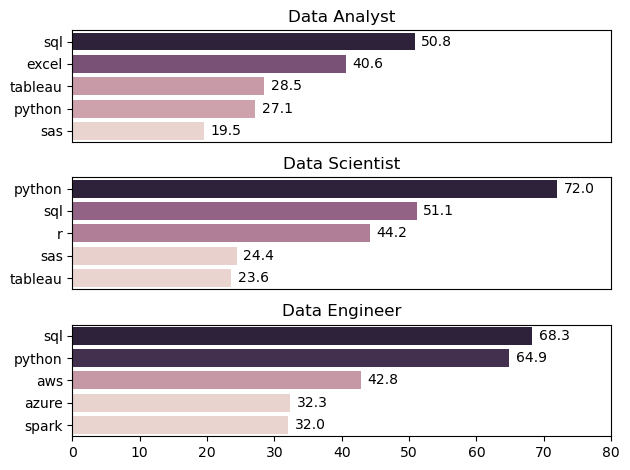

In [74]:
fig,ax = plt.subplots(3,1)
for i, job in enumerate(top_3_jobs):
    df_subset = df_US_true_final[df_US_true_final['job_title_short'] == job]
    sns.barplot(data=df_subset, 
        x='percentage_of_jobs_with_skill', 
        y='job_skills', 
        ax=ax[i], 
        hue='skill_count',
        legend=False
    )
    ax[i].set_title(job)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0,80)
    for n, v in enumerate(df_subset['percentage_of_jobs_with_skill']):
        ax[i].text(v+1, n, v, va='center')
    if(i != len(top_3_jobs)-1):
        ax[i].set_xticks([])

plt.tight_layout()
plt.show()

